In [27]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
# Import our data into pandas from CSV
bike_trip_data_path = 'Resources/trip.csv'
bike_trips_df = pd.read_csv(bike_trip_data_path, low_memory=False)

In [29]:
#  Get the names of the columns.
bike_trips_df.columns

Index(['stoptime', 'bikeid', 'tripduration', 'from_station_name',
       'to_station_name', 'from_station_id', 'to_station_id', 'usertype',
       'gender', 'birthyear'],
      dtype='object')

In [32]:
# Check for null or NaNs.
bike_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   stoptime           286858 non-null  object 
 1   bikeid             286858 non-null  object 
 2   tripduration       286858 non-null  float64
 3   from_station_name  286858 non-null  object 
 4   to_station_name    286858 non-null  object 
 5   from_station_id    286858 non-null  object 
 6   to_station_id      286858 non-null  object 
 7   usertype           286858 non-null  object 
 8   gender             181558 non-null  object 
 9   birthyear          181554 non-null  object 
dtypes: float64(1), object(9)
memory usage: 21.9+ MB


In [33]:
# Create a clean DataFrame after dropping the null values.
CleanDF = bike_trips_df.dropna()

In [34]:
# Split up the data into groups based upon 'gender' and 'stoptime' Note to self things to use groupby / date / columns type / index date.  
# And, find out how many bike trips each gender took.
Group_Gender_Stop = CleanDF.groupby(['gender', 'stoptime']).count()['tripduration']
Group_Gender_Stop

gender    stoptime       
Female    1/1/2015 11:01     2
          1/1/2015 11:54     2
          1/1/2015 12:22     2
          1/1/2015 13:16     4
          1/1/2015 13:32     2
                            ..
Other     9/9/2015 21:41     1
          9/9/2015 7:44      1
          9/9/2015 8:35      1
          9/9/2015 9:44      1
stoptime  4/17/2015 19:21    1
Name: tripduration, Length: 131215, dtype: int64

In [35]:
# Reset the index of the Pandas Series to convert to a DataFrame.
Group_Gender_Stop = Group_Gender_Stop.reset_index()
Group_Gender_Stop
Group_Gender_Stop.head()

,gender,stoptime,tripduration
0,Female,1/1/2015 11:01,2
1,Female,1/1/2015 11:54,2
2,Female,1/1/2015 12:22,2
3,Female,1/1/2015 13:16,4
4,Female,1/1/2015 13:32,2


In [38]:
# Get the datatypes for the DataFrame columns.
Group_Gender_Stop.dtypes

gender          object
stoptime        object
tripduration     int64
dtype: object

In [39]:
#  Change the 'stoptime' column to a datetime object.
Group_Gender_Stop['stoptime'] = pd.to_datetime(Group_Gender_Stop['stoptime']) 
Group_Gender_Stop

,gender,stoptime,tripduration
0,Female,2015-01-01 11:01:00,2
1,Female,2015-01-01 11:54:00,2
2,Female,2015-01-01 12:22:00,2
3,Female,2015-01-01 13:16:00,4
4,Female,2015-01-01 13:32:00,2
...,...,...,...
131210,Other,2015-09-09 21:41:00,1
131211,Other,2015-09-09 07:44:00,1
131212,Other,2015-09-09 08:35:00,1
131213,Other,2015-09-09 09:44:00,1


In [40]:
# Check the datatypes for each column.
Group_Gender_Stop.dtypes

gender                  object
stoptime        datetime64[ns]
tripduration             int64
dtype: object

In [41]:
# Check the DataFrame.
Group_Gender_Stop.head()

,gender,stoptime,tripduration
0,Female,2015-01-01 11:01:00,2
1,Female,2015-01-01 11:54:00,2
2,Female,2015-01-01 12:22:00,2
3,Female,2015-01-01 13:16:00,4
4,Female,2015-01-01 13:32:00,2


In [46]:
# Create a pivot table with the 'stoptime' as the index and the columns ='gender' with the trip counts in each row.
Pivot_Group_Gender_Stop = Group_Gender_Stop.pivot(index='stoptime', columns='gender', values="tripduration" )
Pivot_Group_Gender_Stop

gender,Female,Male,Other,stoptime
stoptime,,,,
2014-10-13 10:47:00,NaN,2.0,NaN,NaN
2014-10-13 10:48:00,4.0,4.0,NaN,NaN
2014-10-13 10:49:00,NaN,2.0,NaN,NaN
2014-10-13 11:45:00,4.0,6.0,NaN,NaN
2014-10-13 11:47:00,2.0,12.0,NaN,NaN
...,...,...,...,...
2016-08-31 22:04:00,NaN,1.0,NaN,NaN
2016-08-31 22:17:00,1.0,1.0,NaN,NaN
2016-08-31 22:25:00,NaN,1.0,NaN,NaN


In [2]:
# Drop the stoptime column.
Pivot_Group_Gender_Stop = Pivot_Group_Gender_Stop.drop('stoptime', axis = 1)
Pivot_Group_Gender_Stop

NameError: name 'Pivot_Group_Gender_Stop' is not defined

In [4]:
# Create a new DataFrame from the pivot table DataFrame by filtering for the given dates, '2015-01-01':'2015-12-31'. 
Bike_Trips_2015 = Pivot_Group_Gender_Stop.loc['2015-01-01':'2015-12-31']

NameError: name 'Pivot_Group_Gender_Stop' is not defined

In [49]:
# Resample the DataFrame by the week. ie., "W", and get the trip counts for each week. 
Bike_Trips_2015_Resample = Bike_Trips_2015.resample('W').count()
Bike_Trips_2015_Resample

gender,Female,Male,Other,stoptime
stoptime,,,,
2015-01-04,68,206,5,0
2015-01-11,247,944,5,0
2015-01-18,226,963,11,0
2015-01-25,313,992,17,0
2015-02-01,294,1036,23,0
2015-02-08,199,783,8,0
2015-02-15,281,1104,24,0
2015-02-22,252,923,31,0
2015-03-01,234,886,27,0


<AxesSubplot:xlabel='stoptime'>

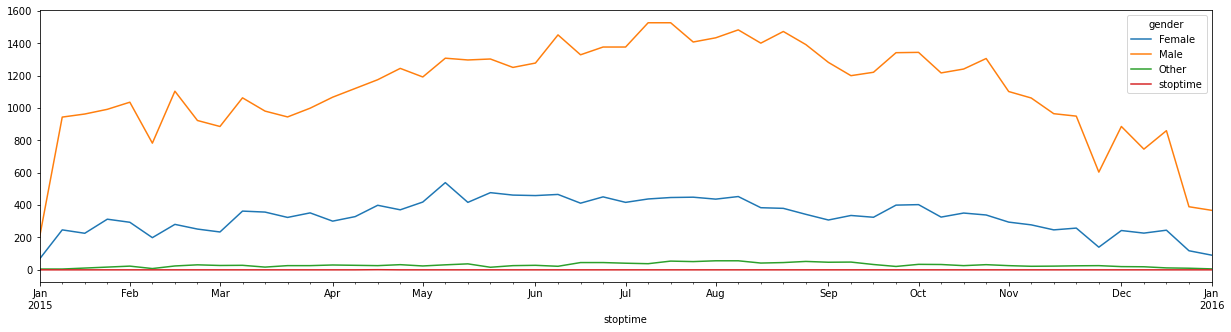

In [52]:
# Plot the resampled DataFrame.
Bike_Trips_2015_Resample.plot(figsize = (21,5))
# Add a title 

#  Add a x- and y-axis label.


